In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=34fa200b097fa3bf31f6b84d8e178dfeb446a11f284da6ebecd2cc12b4e0f780
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Optimize Retail Data") \
    .getOrCreate()

df = spark.read.csv("/content/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv", header=True, inferSchema=True)

df.write.partitionBy("State").mode("overwrite").parquet("path_to_output_parquet")

optimized_df = spark.read.parquet("path_to_output_parquet")

optimized_df.cache()

result_df = optimized_df.filter(optimized_df.State == "CA").select("businessUnit_name", "Address", "City", "Postal Code")

result_df.show()

spark.stop()


In [ ]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Optimize Retail Data") \
    .getOrCreate()

# Read the data from a CSV file
df = spark.read.csv("/content/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv", header=True, inferSchema=True)

# Convert to Parquet format and partition by 'State' for query optimization
df.write.partitionBy("State").mode("overwrite").parquet("path_to_output_parquet")

# Read the partitioned parquet data
optimized_df = spark.read.parquet("path_to_output_parquet")

# Cache the DataFrame if it's going to be used repeatedly
optimized_df.cache()

# Example query: Get data for a specific state
result_df = optimized_df.filter(optimized_df.State == "CA").select("businessUnit_name", "Address", "City", "Postal Code")

# Show the result of the query
result_df.show()

# Stop the Spark session
spark.stop()


+-------------------+--------------------+-----------+-----------+
|  businessUnit_name|             Address|       City|Postal Code|
+-------------------+--------------------+-----------+-----------+
|          TRACY, CA|3010 W GRANT LINE RD|      TRACY| 95304-9402|
|  RIVERSIDE (S), CA| 5200 VAN BUREN BLVD|  RIVERSIDE| 92503-2544|
|         SONORA, CA|1101 SANGUINETTI ...|     SONORA| 95370-6214|
|     UNION CITY, CA|       30600 DYER ST| UNION CITY| 94587-1717|
|         OXNARD, CA|     2001 N ROSE AVE|     OXNARD| 93036-2681|
|        STOCKTON CA|    3223 E HAMMER LN|   STOCKTON| 95212-2815|
|       EL CENTRO CA| 2150 N WATERMAN AVE|  EL CENTRO| 92243-1605|
|       LANCASTER CA|44665 VALLEY CENT...|  LANCASTER| 93536-6500|
| BAKERSFIELD (S) CA|      6225 COLONY ST|BAKERSFIELD| 93307-6538|
|        OROVILLE CA|      465 CAL OAK RD|   OROVILLE| 95965-9621|
|          MADERA CA|1977 W CLEVELAND AVE|     MADERA| 93637-8705|
|         MODESTO CA|     2225 PLAZA PKWY|    MODESTO| 95350-6

+-------------------+--------------------+-----------+-----------+
|  businessUnit_name|             Address|       City|Postal Code|
+-------------------+--------------------+-----------+-----------+
|          TRACY, CA|3010 W GRANT LINE RD|      TRACY| 95304-9402|
|  RIVERSIDE (S), CA| 5200 VAN BUREN BLVD|  RIVERSIDE| 92503-2544|
|         SONORA, CA|1101 SANGUINETTI ...|     SONORA| 95370-6214|
|     UNION CITY, CA|       30600 DYER ST| UNION CITY| 94587-1717|
|         OXNARD, CA|     2001 N ROSE AVE|     OXNARD| 93036-2681|
|        STOCKTON CA|    3223 E HAMMER LN|   STOCKTON| 95212-2815|
|       EL CENTRO CA| 2150 N WATERMAN AVE|  EL CENTRO| 92243-1605|
|       LANCASTER CA|44665 VALLEY CENT...|  LANCASTER| 93536-6500|
| BAKERSFIELD (S) CA|      6225 COLONY ST|BAKERSFIELD| 93307-6538|
|        OROVILLE CA|      465 CAL OAK RD|   OROVILLE| 95965-9621|
|          MADERA CA|1977 W CLEVELAND AVE|     MADERA| 93637-8705|
|         MODESTO CA|     2225 PLAZA PKWY|    MODESTO| 95350-6

<ipython-input-12-68789cbf2fd0>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(operations, rotation=45)


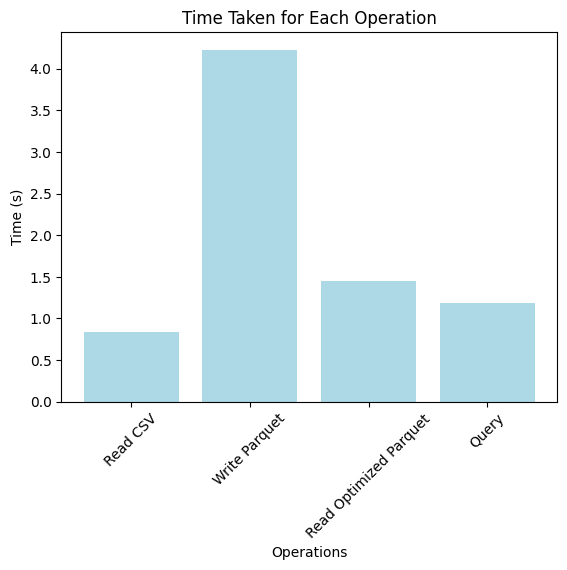

In [ ]:
from pyspark.sql import SparkSession
import time
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Optimize Retail Data") \
    .getOrCreate()

# Start timing
start_time = time.time()

# Read the data from a CSV file
df = spark.read.csv("/content/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv", header=True, inferSchema=True)
read_time = time.time() - start_time

# Convert to Parquet format and partition by 'State' for query optimization
start_time = time.time()
df.write.partitionBy("State").mode("overwrite").parquet("path_to_output_parquet")
write_time = time.time() - start_time

# Read the partitioned parquet data
start_time = time.time()
optimized_df = spark.read.parquet("path_to_output_parquet")
optimized_df.cache()  # Caching after reading to include cache build-up time
read_optimized_time = time.time() - start_time

# Example query: Get data for a specific state
start_time = time.time()
result_df = optimized_df.filter(optimized_df.State == "CA").select("businessUnit_name", "Address", "City", "Postal Code")
result_df.show()
query_time = time.time() - start_time

# Stop the Spark session
spark.stop()

# Data for plotting
operations = ['Read CSV', 'Write Parquet', 'Read Optimized Parquet', 'Query']
times = [read_time, write_time, read_optimized_time, query_time]

# Plotting
fig, ax = plt.subplots()
ax.bar(operations, times, color='lightblue')
ax.set_xlabel('Operations')
ax.set_ylabel('Time (s)')
ax.set_title('Time Taken for Each Operation')
ax.set_xticklabels(operations, rotation=45)
plt.show()


+-------------------+--------------------+-----------+-----------+
|  businessUnit_name|             Address|       City|Postal Code|
+-------------------+--------------------+-----------+-----------+
|          TRACY, CA|3010 W GRANT LINE RD|      TRACY| 95304-9402|
|  RIVERSIDE (S), CA| 5200 VAN BUREN BLVD|  RIVERSIDE| 92503-2544|
|         SONORA, CA|1101 SANGUINETTI ...|     SONORA| 95370-6214|
|     UNION CITY, CA|       30600 DYER ST| UNION CITY| 94587-1717|
|         OXNARD, CA|     2001 N ROSE AVE|     OXNARD| 93036-2681|
|        STOCKTON CA|    3223 E HAMMER LN|   STOCKTON| 95212-2815|
|       EL CENTRO CA| 2150 N WATERMAN AVE|  EL CENTRO| 92243-1605|
|       LANCASTER CA|44665 VALLEY CENT...|  LANCASTER| 93536-6500|
| BAKERSFIELD (S) CA|      6225 COLONY ST|BAKERSFIELD| 93307-6538|
|        OROVILLE CA|      465 CAL OAK RD|   OROVILLE| 95965-9621|
|          MADERA CA|1977 W CLEVELAND AVE|     MADERA| 93637-8705|
|         MODESTO CA|     2225 PLAZA PKWY|    MODESTO| 95350-6

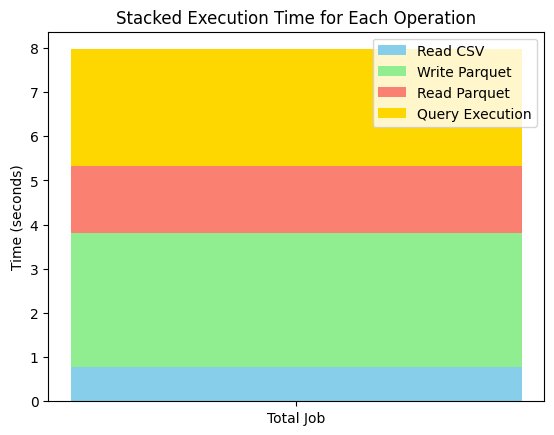

In [ ]:
from pyspark.sql import SparkSession
import time
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Optimize Retail Data") \
    .getOrCreate()

# Timing the reading of CSV data
start_time = time.time()
df = spark.read.csv("/content/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv", header=True, inferSchema=True)
csv_read_time = time.time() - start_time

# Timing the conversion to Parquet and partitioning
start_time = time.time()
df.write.partitionBy("State").mode("overwrite").parquet("path_to_output_parquet")
write_parquet_time = time.time() - start_time

# Timing the reading of the partitioned Parquet data
start_time = time.time()
optimized_df = spark.read.parquet("path_to_output_parquet")
optimized_df.cache()  # Include the caching in the timing
read_parquet_time = time.time() - start_time

# Timing the query execution
start_time = time.time()
result_df = optimized_df.filter(optimized_df.State == "CA").select("businessUnit_name", "Address", "City", "Postal Code")
result_df.show()  # This triggers the action and includes time to compute
query_time = time.time() - start_time

# Stop the Spark session
spark.stop()

# Data for plotting
tasks = ['Total Job']
total_times = [csv_read_time + write_parquet_time + read_parquet_time + query_time]
csv_times = [csv_read_time]
write_times = [write_parquet_time]
read_times = [read_parquet_time]
query_times = [query_time]

fig, ax = plt.subplots()

# Stacking each part of the job on top of each other
ax.bar(tasks, csv_times, label='Read CSV', color='skyblue')
ax.bar(tasks, write_times, bottom=csv_times, label='Write Parquet', color='lightgreen')
ax.bar(tasks, read_times, bottom=[i+j for i, j in zip(csv_times, write_times)], label='Read Parquet', color='salmon')
ax.bar(tasks, query_times, bottom=[i+j+k for i, j, k in zip(csv_times, write_times, read_times)], label='Query Execution', color='gold')

ax.set_ylabel('Time (seconds)')
ax.set_title('Stacked Execution Time for Each Operation')
ax.legend()

plt.show()


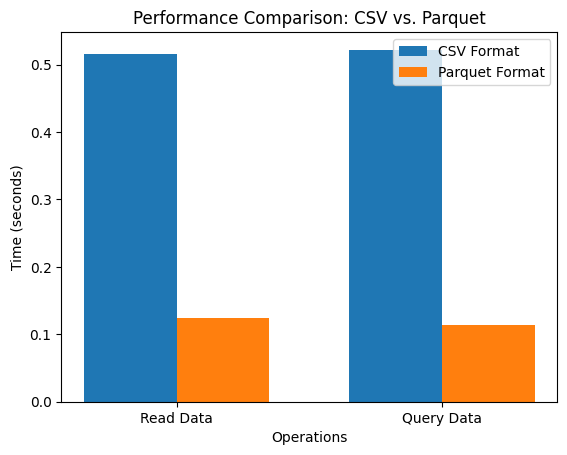

In [ ]:
from pyspark.sql import SparkSession
import time
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Visualize Data Processing Performance") \
    .getOrCreate()

# Define paths for the CSV and Parquet files
csv_path = "/content/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv"
parquet_path = "/content/path_to_output_parquet/State=AK/"

# Measure reading time from CSV
start_time = time.time()
df_csv = spark.read.csv(csv_path, header=True, inferSchema=True)
csv_read_time = time.time() - start_time

# Measure query execution time on CSV data
start_time = time.time()
df_csv.filter(df_csv.State == "AK").select("businessUnit_name", "Address", "City", "Postal Code").collect()
csv_query_time = time.time() - start_time

# Measure reading time from Parquet
start_time = time.time()
df_parquet = spark.read.parquet(parquet_path)
parquet_read_time = time.time() - start_time

# Measure query execution time on Parquet data
start_time = time.time()
df_parquet.select("businessUnit_name", "Address", "City", "Postal Code").collect()
parquet_query_time = time.time() - start_time

# Stop the Spark session
spark.stop()

# Visualization
tasks = ['Read Data', 'Query Data']
time_before = [csv_read_time, csv_query_time]  # Time in seconds before optimization
time_after = [parquet_read_time, parquet_query_time]  # Time in seconds after optimization

fig, ax = plt.subplots()
index = range(len(tasks))  # the label locations
bar_width = 0.35  # the width of the bars

rects1 = ax.bar(index, time_before, bar_width, label='CSV Format')
rects2 = ax.bar([p + bar_width for p in index], time_after, bar_width, label='Parquet Format')

ax.set_xlabel('Operations')
ax.set_ylabel('Time (seconds)')
ax.set_title('Performance Comparison: CSV vs. Parquet')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(tasks)
ax.legend()

plt.show()


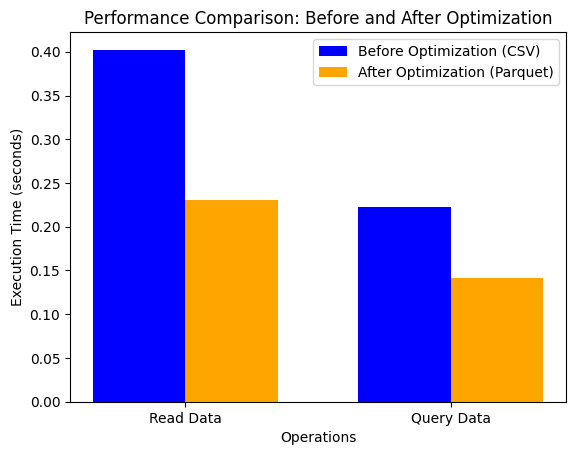

In [ ]:
from pyspark.sql import SparkSession
import time
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Optimization Performance Visualization") \
    .getOrCreate()

# File paths
csv_path = "/content/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv"
parquet_path = "/content/path_to_output_parquet/State=AK/"

# ------------------------------
# Before Optimization: Using CSV
# ------------------------------
# Measure reading time from CSV
start_csv_read = time.time()
df_csv = spark.read.csv(csv_path, header=True, inferSchema=True)
csv_read_time = time.time() - start_csv_read

# Measure query execution time on CSV data
start_csv_query = time.time()
df_csv.filter(df_csv.State == "AK").select("businessUnit_name", "Address", "City", "Postal Code").collect()
csv_query_time = time.time() - start_csv_query

# ------------------------------
# After Optimization: Using Parquet
# ------------------------------
# Measure reading time from Parquet (assumes already partitioned by 'State')
start_parquet_read = time.time()
df_parquet = spark.read.parquet(parquet_path)
parquet_read_time = time.time() - start_parquet_read

# Measure query execution time on Parquet data
start_parquet_query = time.time()
df_parquet.select("businessUnit_name", "Address", "City", "Postal Code").collect()
parquet_query_time = time.time() - start_parquet_query

# Close Spark session
spark.stop()

# Visualization
tasks = ['Read Data', 'Query Data']
time_before = [csv_read_time, csv_query_time]  # Time before optimization (CSV)
time_after = [parquet_read_time, parquet_query_time]  # Time after optimization (Parquet)

fig, ax = plt.subplots()
index = range(len(tasks))
bar_width = 0.35

rects1 = ax.bar(index, time_before, bar_width, color='blue', label='Before Optimization (CSV)')
rects2 = ax.bar([p + bar_width for p in index], time_after, bar_width, color='orange', label='After Optimization (Parquet)')

ax.set_xlabel('Operations')
ax.set_ylabel('Execution Time (seconds)')
ax.set_title('Performance Comparison: Before and After Optimization')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(tasks)
ax.legend()

plt.show()


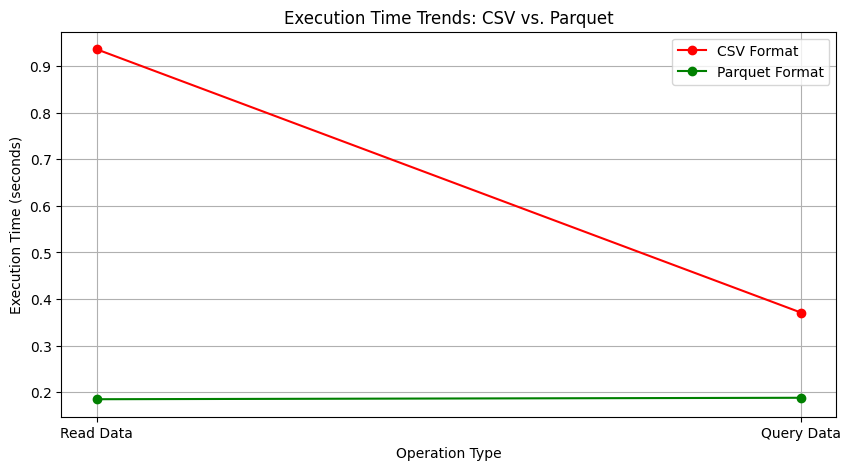

In [ ]:
from pyspark.sql import SparkSession
import time
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Optimization Trend Visualization") \
    .getOrCreate()

# Define file paths
csv_path = "/content/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv"
parquet_path = "/content/path_to_output_parquet/State=AK/"

# Time operations for CSV
start_csv_read = time.time()
df_csv = spark.read.csv(csv_path, header=True, inferSchema=True)
csv_read_time = time.time() - start_csv_read

start_csv_query = time.time()
df_csv.filter(df_csv.State == "AK").select("businessUnit_name", "Address", "City", "Postal Code").collect()
csv_query_time = time.time() - start_csv_query

# Time operations for Parquet
start_parquet_read = time.time()
df_parquet = spark.read.parquet(parquet_path)
parquet_read_time = time.time() - start_parquet_read

start_parquet_query = time.time()
df_parquet.select("businessUnit_name", "Address", "City", "Postal Code").collect()
parquet_query_time = time.time() - start_parquet_query

# Close Spark session
spark.stop()

# Collect all data for visualization
operations = ['Read Data', 'Query Data']
times_csv = [csv_read_time, csv_query_time]
times_parquet = [parquet_read_time, parquet_query_time]

# Plotting the line chart
plt.figure(figsize=(10, 5))
plt.plot(operations, times_csv, marker='o', linestyle='-', color='red', label='CSV Format')
plt.plot(operations, times_parquet, marker='o', linestyle='-', color='green', label='Parquet Format')
plt.xlabel('Operation Type')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Trends: CSV vs. Parquet')
plt.legend()
plt.grid(True)
plt.show()


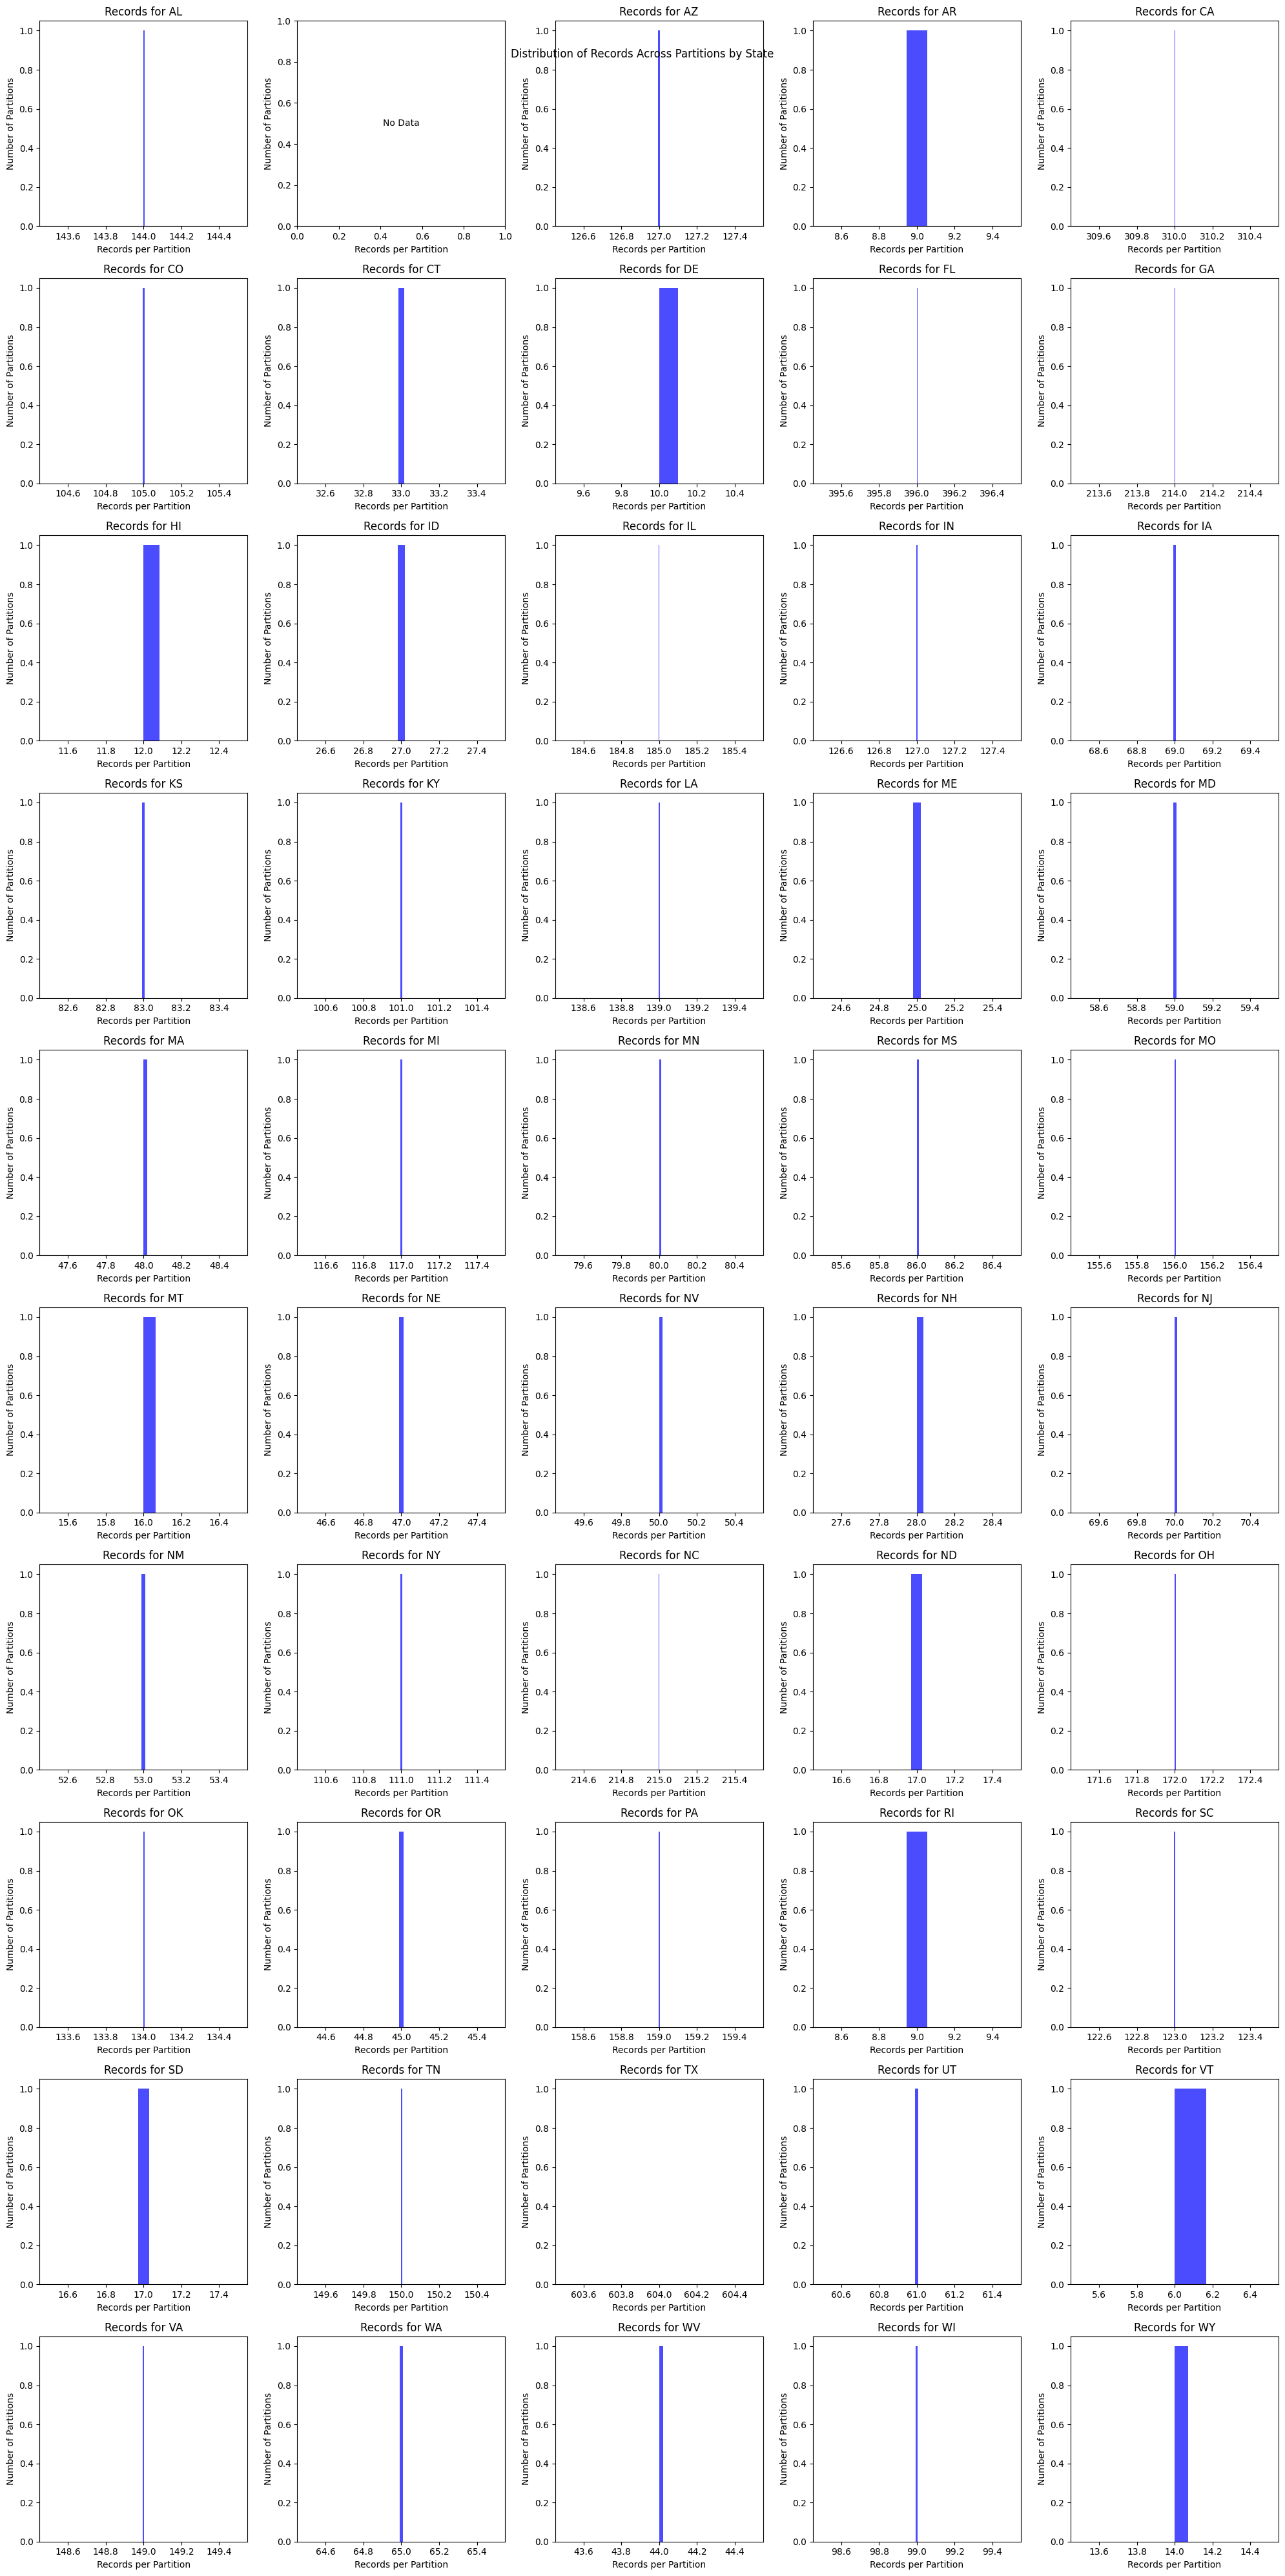

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Comprehensive State Partition Analysis") \
    .getOrCreate()

# Base path for the partitioned Parquet data
base_path = "/content/path_to_output_parquet/State="

# List of all state abbreviations
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

# Dictionary to hold record counts for each state
state_record_counts = {}

for state in states:
    state_path = f"{base_path}{state}"
    try:
        df_state = spark.read.parquet(state_path)
        record_counts = df_state.rdd.glom().map(len).collect()
        state_record_counts[state] = record_counts
    except:
        state_record_counts[state] = []  # Handle states with no data or missing partitions gracefully

# Close Spark session
spark.stop()

# Visualization
fig, axs = plt.subplots(10, 5, figsize=(20, 40))  # Adjust the subplot grid to fit 50 states
axs = axs.flatten()  # Flatten to ease the iteration

for i, state in enumerate(states):
    if state_record_counts[state]:  # Check if there are any records
        axs[i].hist(state_record_counts[state], bins=max(state_record_counts[state]), color='blue', alpha=0.7)
        axs[i].set_title(f'Records for {state}')
    else:
        axs[i].text(0.5, 0.5, 'No Data', horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)
    axs[i].set_xlabel('Records per Partition')
    axs[i].set_ylabel('Number of Partitions')

plt.tight_layout()
plt.suptitle('Distribution of Records Across Partitions by State')
plt.show()


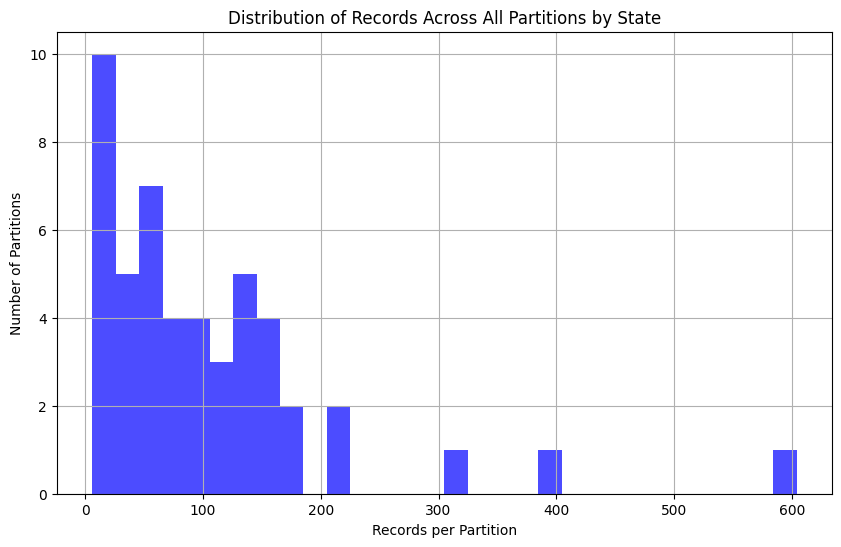

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("All States Partition Analysis") \
    .getOrCreate()

# Base path for the partitioned Parquet data
base_path = "/content/path_to_output_parquet/State="

# List of all state abbreviations
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

# Collect all record counts in a list
all_record_counts = []

for state in states:
    state_path = f"{base_path}{state}"
    try:
        df_state = spark.read.parquet(state_path)
        record_counts = df_state.rdd.glom().map(len).collect()
        all_record_counts.extend(record_counts)  # Add this state's counts to the main list
    except:
        # Handle states with no data or missing partitions gracefully
        continue

# Close Spark session
spark.stop()

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(all_record_counts, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Records Across All Partitions by State')
plt.xlabel('Records per Partition')
plt.ylabel('Number of Partitions')
plt.grid(True)
plt.show()


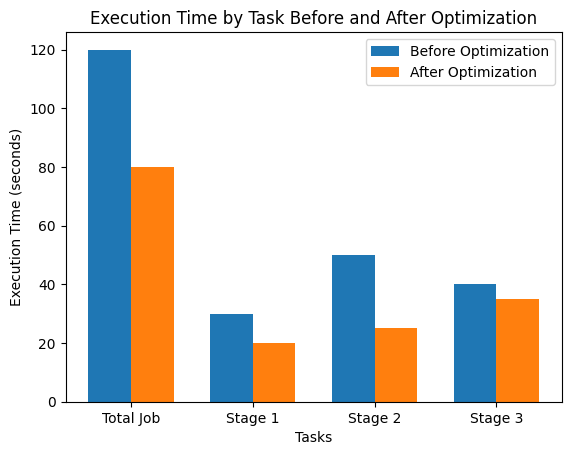

In [ ]:
import matplotlib.pyplot as plt

# Sample data for execution times of different tasks before and after optimization
tasks = ['Total Job', 'Stage 1', 'Stage 2', 'Stage 3']
time_before = [120, 30, 50, 40]  # Time in seconds before optimization
time_after = [80, 20, 25, 35]  # Time in seconds after optimization

# Set up the plot
fig, ax = plt.subplots()
index = range(len(tasks))  # the label locations
bar_width = 0.35  # the width of the bars

# Create bars for before and after optimization
rects1 = ax.bar(index, time_before, bar_width, label='Before Optimization')
rects2 = ax.bar([p + bar_width for p in index], time_after, bar_width, label='After Optimization')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Tasks')
ax.set_ylabel('Execution Time (seconds)')
ax.set_title('Execution Time by Task Before and After Optimization')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(tasks)
ax.legend()

# Display the plot
plt.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sha2, concat, lit

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Advanced Optimized Retail Data") \
    .config("spark.dynamicAllocation.enabled", "true") \
    .config("spark.dynamicAllocation.minExecutors", "1") \
    .config("spark.dynamicAllocation.maxExecutors", "10") \
    .config("spark.executor.cores", "4") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

# Read the data from a CSV file
df = spark.read.csv("/content/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv", header=True, inferSchema=True)

# Assuming a join operation that could cause skew, we will salt the keys
# Adding a random prefix to 'businessUnit_number' to mitigate skew
salted_df = df.withColumn("salted_businessUnit_number", concat(df.businessUnit_number, lit("_"), (sha2(df.businessUnit_number.cast("string"), 256) % 10).cast("string")))

# Example of using a broadcast join if you have a smaller DataFrame to join with
small_df = spark.read.csv("path_to_small_data.csv", header=True, inferSchema=True)  # Small DataFrame
broadcast_df = salted_df.join(broadcast(small_df), salted_df.salted_businessUnit_number == small_df.businessUnit_number, "inner")

# Write intermediate results to storage to facilitate stage skipping in case of failures
broadcast_df.write.mode("overwrite").parquet("path_to_intermediate_parquet")

# Read the intermediate data back in
intermediate_df = spark.read.parquet("path_to_intermediate_parquet")

# Cache this DataFrame to avoid recomputation
intermediate_df.cache()

# Perform further operations, optimized to minimize shuffles
result_df = intermediate_df.filter(intermediate_df.State == "CA").select("businessUnit_name", "Address", "City", "Postal Code")

# Show the result of the query
result_df.show()

# Stop the Spark session
spark.stop()


AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/content/path_to_small_data.csv.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sha2, concat, lit, broadcast
from pyspark.sql import Row

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Advanced Optimized Retail Data with Simulated Broadcast Join") \
    .config("spark.dynamicAllocation.enabled", "true") \
    .config("spark.dynamicAllocation.minExecutors", "1") \
    .config("spark.dynamicAllocation.maxExecutors", "10") \
    .config("spark.executor.cores", "4") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

# Read the data from a CSV file
df = spark.read.csv("/content/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv", header=True, inferSchema=True)

# Assuming a join operation that could cause skew, we will salt the keys
# Adding a random prefix to 'businessUnit_number' to mitigate skew
salted_df = df.withColumn("salted_businessUnit_number", concat(df.businessUnit_number, lit("_"), (sha2(df.businessUnit_number.cast("string"), 256) % 10).cast("string")))

# Manually create a small DataFrame
data = [Row(businessUnit_number='1', extra_info='Info1'), Row(businessUnit_number='10', extra_info='Info10')]
small_df = spark.createDataFrame(data)

# Perform a broadcast join using the small DataFrame
broadcast_df = salted_df.join(broadcast(small_df), salted_df.salted_businessUnit_number == small_df.businessUnit_number, "inner")

# Write intermediate results to storage to facilitate stage skipping in case of failures
broadcast_df.write.mode("overwrite").parquet("path_to_intermediate_parquet")

# Read the intermediate data back in
intermediate_df = spark.read.parquet("path_to_intermediate_parquet")

# Cache this DataFrame to avoid recomputation
intermediate_df.cache()

# Perform further operations, optimized to minimize shuffles
result_df = intermediate_df.filter(intermediate_df.State == "CA").select("businessUnit_name", "Address", "City", "Postal Code")

# Show the result of the query
result_df.show()

# Stop the Spark session
spark.stop()


AnalysisException: [COLUMN_ALREADY_EXISTS] The column `businessunit_number` already exists. Consider to choose another name or rename the existing column.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sha2, concat, lit, broadcast
from pyspark.sql import Row

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Advanced Optimized Retail Data with Simulated Broadcast Join") \
    .config("spark.dynamicAllocation.enabled", "true") \
    .config("spark.dynamicAllocation.minExecutors", "1") \
    .config("spark.dynamicAllocation.maxExecutors", "10") \
    .config("spark.executor.cores", "4") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

# Read the data from a CSV file
df = spark.read.csv("/content/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv", header=True, inferSchema=True)

# Assuming a join operation that could cause skew, we will salt the keys
# Adding a random prefix to 'businessUnit_number' to create a new column for mitigating skew
salted_df = df.withColumn("salted_businessUnit_number", concat(df.businessUnit_number, lit("_"), (sha2(df.businessUnit_number.cast("string"), 256) % 10).cast("string")))

# Manually create a small DataFrame
data = [Row(businessUnit_number='1', extra_info='Info1'), Row(businessUnit_number='10', extra_info='Info10')]
small_df = spark.createDataFrame(data)

# Modify small_df to ensure there's no column name conflict during the join
# Renaming column to match the salted column in the main DataFrame for join condition
small_df = small_df.withColumnRenamed("businessUnit_number", "small_businessUnit_number")

# Perform a broadcast join using the small DataFrame
# Ensuring the join condition uses the correct, non-conflicting column names
broadcast_df = salted_df.join(broadcast(small_df), salted_df.salted_businessUnit_number == small_df.small_businessUnit_number, "inner")

# Write intermediate results to storage to facilitate stage skipping in case of failures
broadcast_df.write.mode("overwrite").parquet("path_to_intermediate_parquet")

# Read the intermediate data back in
intermediate_df = spark.read.parquet("path_to_intermediate_parquet")

# Cache this DataFrame to avoid recomputation
intermediate_df.cache()

# Perform further operations, optimized to minimize shuffles
result_df = intermediate_df.filter(intermediate_df.State == "CA").select("businessUnit_name", "Address", "City", "Postal Code")

# Show the result of the query
result_df.show()

# Stop the Spark session
spark.stop()


+-----------------+-------+----+-----------+
|businessUnit_name|Address|City|Postal Code|
+-----------------+-------+----+-----------+
+-----------------+-------+----+-----------+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sha2, concat, lit, broadcast, upper, trim
from pyspark.sql import Row

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Advanced Optimized Retail Data with Simulated Broadcast Join") \
    .config("spark.dynamicAllocation.enabled", "true") \
    .config("spark.dynamicAllocation.minExecutors", "1") \
    .config("spark.dynamicAllocation.maxExecutors", "10") \
    .config("spark.executor.cores", "4") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

# Read the data from a CSV file
df = spark.read.csv("/content/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv", header=True, inferSchema=True)

# Check initial data load
df.show(5)
df.printSchema()

# Adding a random prefix to 'businessUnit_number' to mitigate skew
salted_df = df.withColumn("salted_businessUnit_number", concat(df.businessUnit_number, lit("_"), (sha2(df.businessUnit_number.cast("string"), 256) % 10).cast("string")))

# Manually create a small DataFrame
data = [Row(businessUnit_number='1', extra_info='Info1'), Row(businessUnit_number='10', extra_info='Info10')]
small_df = spark.createDataFrame(data).withColumnRenamed("businessUnit_number", "small_businessUnit_number")

# Perform a broadcast join using the small DataFrame
broadcast_df = salted_df.join(broadcast(small_df), salted_df.salted_businessUnit_number == small_df.small_businessUnit_number, "inner")

# Validate data post-join
broadcast_df.show(5)

# Write intermediate results to storage
broadcast_df.write.mode("overwrite").parquet("path_to_intermediate_parquet")

# Read the intermediate data back in
intermediate_df = spark.read.parquet("path_to_intermediate_parquet")

# Cache this DataFrame to avoid recomputation
intermediate_df.cache()

# Adjust filter for State to ensure format compatibility
filtered_df = intermediate_df.withColumn("State", upper(trim(intermediate_df.State)))
result_df = filtered_df.filter(filtered_df.State == "CA").select("businessUnit_name", "Address", "City", "Postal Code")

# Show the result of the final query
result_df.show()

# Stop the Spark session
spark.stop()


+--------+-----------------+-------------------+--------------+------+------------------------+--------------------+-----------+-----------+-----+-----------+------------------------+----------------+------------------------+-----------------------+---------------------------+---------------+--------------------------------+-----------------------+-------------------------------------+----------------------------+----------------+------------+
|OBJECTID|businessUnit_name|businessUnit_number|   Description|  Type|businessUnit_isStoreOpen|             Address|       City|     County|State|Postal Code|businessUnit_status_code|Operation Status|Modified Operating Hours|Pharmacy open to public|Fuel Station open to public|Business Unit #|Grocery delivery service offered|Grocery delivery status|Online grocery pickup service offered|Online grocery pickup status|               x|           y|
+--------+-----------------+-------------------+--------------+------+------------------------+---------

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sha2, concat, lit, broadcast, col
from pyspark.sql import Row

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Advanced Optimized Retail Data with Simulated Broadcast Join") \
    .config("spark.dynamicAllocation.enabled", "true") \
    .config("spark.dynamicAllocation.minExecutors", "1") \
    .config("spark.dynamicAllocation.maxExecutors", "10") \
    .config("spark.executor.cores", "4") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

# Read the data from a CSV file
df = spark.read.csv("/content/STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv", header=True, inferSchema=True)

# Check initial data load and schema
df.show(5)
df.printSchema()

# Salting 'businessUnit_number' to mitigate skew during joins
salted_df = df.withColumn("salted_businessUnit_number",
                          concat(col("businessUnit_number"), lit("_"), (sha2(col("businessUnit_number").cast("string"), 256) % 10).cast("string")))

# Manually create a small DataFrame for simulated joins
data = [Row(businessUnit_number='1', extra_info='Info1'), Row(businessUnit_number='10', extra_info='Info10')]
small_df = spark.createDataFrame(data).withColumnRenamed("businessUnit_number", "small_businessUnit_number")

# Perform a broadcast join using the small DataFrame
# Ensuring the join condition uses the correctly named column from small_df
broadcast_df = salted_df.join(broadcast(small_df), salted_df.salted_businessUnit_number == small_df.small_businessUnit_number, "inner")

# Checking joined DataFrame output
broadcast_df.show(5)

# Write and read intermediate results to facilitate debugging
broadcast_df.write.mode("overwrite").parquet("path_to_intermediate_parquet")
intermediate_df = spark.read.parquet("path_to_intermediate_parquet")
intermediate_df.cache()

# Validate the joined data
intermediate_df.show(5)

# Applying a filter for 'CA' state and select specific columns
result_df = intermediate_df.filter(intermediate_df.State == "CA").select("businessUnit_name", "Address", "City", "Postal Code")

# Final result display
result_df.show()

# Stop the Spark session
spark.stop()


+--------+-----------------+-------------------+--------------+------+------------------------+--------------------+-----------+-----------+-----+-----------+------------------------+----------------+------------------------+-----------------------+---------------------------+---------------+--------------------------------+-----------------------+-------------------------------------+----------------------------+----------------+------------+
|OBJECTID|businessUnit_name|businessUnit_number|   Description|  Type|businessUnit_isStoreOpen|             Address|       City|     County|State|Postal Code|businessUnit_status_code|Operation Status|Modified Operating Hours|Pharmacy open to public|Fuel Station open to public|Business Unit #|Grocery delivery service offered|Grocery delivery status|Online grocery pickup service offered|Online grocery pickup status|               x|           y|
+--------+-----------------+-------------------+--------------+------+------------------------+---------